# Call Center Cleanup

For this assignment, we will be working with call center data. You can start working on the assignment after the first lesson on Exploratory Data Analysis with pandas. Make sure to read the whole assignment before starting anything! As you code along in the Jupyter notebook, you are asked to make note of the results of your analysis. Do so by clicking on the results box and adding your notes beside each question.

## Business Issue and Understanding

You are working for a company that has two call centers: the North Call Center and the South Call Center. The company is looking to possibly hire five additional reps to enhance customer experience. Your task is to explore how efficient the current reps are in each branch to determine which branch would benefit from additional assistance.

### How the Call Center Works

Call center representatives are assigned queues. When calls are assigned to a queue, the call is assigned to the next person in line in the queue. After a call is assigned to a representative, the amount of time between assignment and the call starting is divided into busy minutes and not ready minutes. If the call is incoming and a customer is waiting on the phone for a rep, the time is split into three categories: busy minutes, not ready minutes, and incoming call wait time. Once the rep has the customer on the phone, there might be during call wait time, where the call is put on hold while the rep gets an answer for the customer.

### Notes about the Dataset

If you haven't worked in a call center before, these notes might help you throughout your analysis.

* The call purpose is tagged for each call.
* The time of the call is tagged in 1 hour blocks starting at 9:00 AM and ending at 5:00 PM.
* Calls are tagged as incoming or outgoing.
* Reps are assigned to queues. When the reps are working, they take calls in the order of their queue.
* A call that is dropped due to technical error or missed by the center because they have reached maximum capacity is a lost call.
* An abandoned call is when the customer hangs up because they have been waiting for too long.
* Busy Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are busy with other customers.
* Not Ready Minutes: the amount of time after a call comes in or needs to go out where the assigned rep is not available because they are not ready (for example, getting water).
* Incoming Wait Time - amount of time after assigned rep is available to take the call customer waits for representative to pick up a call. This is tracked in seconds.
* During Call Wait Time - amount of time during call that customer has to wait for representative

## Getting Started

You have two CSVs at your disposal, `NorthCallCenter.csv` and `SouthCallCenter.csv`. Import the appropriate libraries and create two dataframes, one called `north_df` and one called `south_df`.

In [1]:
# Import the appropriate libraries with aliases

import pandas as pd


# Create two new dataframes

north_df = pd.read_csv("NorthCallCenter.csv")

south_df = pd.read_csv("SouthCallCenter.csv")

print(north_df.head())

print(south_df.head())


   Unnamed: 0 Branch     Call Purpose Time Block Incoming or Outgoing Queue  \
0           0  North        Complaint    9:00 AM             Incoming     B   
1           1  North    Sales Support   11:00 AM             Incoming     A   
2           2  North    Sales Support   11:00 AM             Incoming     B   
3           3  North    Sales Support    4:00 PM             Incoming     B   
4           4  North  Product Support   12:00 PM             Incoming     B   

  Rep ID Sale  Lost Call  Abandoned  Busy Minutes  Not Ready Minutes  \
0  Brent   NO          0          1             9                  2   
1    Cam   NO          0          0            11                  1   
2   Todd   NO          0          0             9                  3   
3  Brent   NO          0          0            11                  2   
4  Brent   NO          0          0             8                  2   

   Incoming Wait Time  During Call Wait Time  Calls  
0                 1.0                 

## Task 1: Exploratory Data Analysis

Time to do some EDA! In the process of learning more about the two datasets, answer the following questions. Use the code blocks below to begin cleaning your data. At the end of the section, record your answers.

#### EDA Question 1A:  How many reps are in the North branch?  

In [2]:
# EDA Question 1A solution below:

north_rep_count = north_df['Rep ID'].nunique()
print(f"North Number of Reps: {north_rep_count}")

North Number of Reps: 9


#### EDA Question 1B:  How many reps are in the South branch?  

In [3]:
# EDA Question 1B solution Below:
south_rep_count = south_df['Rep ID'].nunique()
print(f"North Number of Reps: {south_rep_count}")

North Number of Reps: 11


#### EDA Question 2A:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the North branch? 

In [4]:
# EDA Question 2A solution Below:
column_check_list = ["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]

print("North Branch")
for column in column_check_list:
    mean = north_df[column].mean()
    print(f"{column} average: {mean}")

North Branch
Busy Minutes average: 9.987755102040817
Not Ready Minutes average: 1.9142857142857144
Incoming Wait Time average: 3.048780487804878
During Call Wait Time average: 2.9673469387755103


#### EDA Question 2B:  What is the average busy minutes, not ready minutes, incoming wait time, and during call wait time for the South branch? 

In [5]:
# EDA Question 2B solution Below:
column_check_list = ["Busy Minutes", "Not Ready Minutes", "Incoming Wait Time", "During Call Wait Time"]

print("South Branch")
for column in column_check_list:
    mean = south_df[column].mean()
    print(f"{column} average: {mean}")

South Branch
Busy Minutes average: 10.054140127388536
Not Ready Minutes average: 1.910828025477707
Incoming Wait Time average: 3.0
During Call Wait Time average: 3.0764331210191083


#### EDA Question 3:  What is the number of calls taken for each time block(Both North and South combined)?

In [6]:
# EDA Question 3 solution Below:
dfs = [north_df, south_df]
combined_df = pd.concat(dfs, ignore_index=True)

grouped_combined_df = combined_df.groupby('Time Block')

grouped_combined_df_totals = grouped_combined_df["Calls"].count()

print(grouped_combined_df_totals)

Time Block
10:00 AM     99
11:00 AM     56
12:00 PM    120
1:00 PM      40
2:00 PM      65
3:00 PM      73
4:00 PM      53
5:00 PM      43
9:00 AM      10
Name: Calls, dtype: int64


##### Record your answers for the EDA section below:
- 1a) Reps in the North Branch = 9
- 1b) Reps in the South Branch = 11


- 2a) North Branch, (round to the nearest hundredth):
> - Busy Minutes = 9.99
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.05
> - During Call Wait Time = 2.97
- 2b) South Branch, (round to the nearest hundredth):
> - Busy Minutes = 10.05
> - Not Ready Minutes = 1.91
> - Incoming Wait Time = 3.0
> - During Call Wait Time = 3.08
- 3) Total Calls taken for all branches per time block:
> - 9:00AM   = 10
> - 10:00AM  = 99
> - 11:00AM  = 56
> - 12:00PM  = 120
> - 1:00PM   = 40
> - 2:00PM   = 65
> - 3:00PM   = 73
> - 4:00PM   = 53
> - 5:00PM   = 43



## Task 2: Cleaning Your Data 
Now you need to clean up the datasets. When cleaning the datasets, you may find that there isn't dirty data to clean. That is okay! Some questions you need to answer about the data sets.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. 

In [7]:
missing_data = north_df.isna().sum()
print("North Branch")
print(missing_data)

percentage_missing = (north_df.isna().sum() / len(north_df)) * 100
print("North Branch")
print(percentage_missing)
print("*************************")

missing_data = south_df.isna().sum()
print("South Branch")
print(missing_data)

percentage_missing = (south_df.isna().sum() / len(south_df)) * 100
print("South Branch")
print(percentage_missing)


print(north_df["Incoming Wait Time"].mean())

print(south_df["Incoming Wait Time"].mean())

North Branch
Unnamed: 0                 0
Branch                     0
Call Purpose               0
Time Block                 0
Incoming or Outgoing       0
Queue                      0
Rep ID                     0
Sale                       0
Lost Call                  0
Abandoned                  0
Busy Minutes               0
Not Ready Minutes          0
Incoming Wait Time       163
During Call Wait Time      0
Calls                      0
dtype: int64
North Branch
Unnamed: 0                0.000000
Branch                    0.000000
Call Purpose              0.000000
Time Block                0.000000
Incoming or Outgoing      0.000000
Queue                     0.000000
Rep ID                    0.000000
Sale                      0.000000
Lost Call                 0.000000
Abandoned                 0.000000
Busy Minutes              0.000000
Not Ready Minutes         0.000000
Incoming Wait Time       66.530612
During Call Wait Time     0.000000
Calls                     0.000000
d

#### Cleaning Question 1:  Is there any missing data and if yes explain what you would do with the missing data and why?

In [8]:
# Question 1 solution below

#### Record your answer below:

> Your Answer: Both the North and South have significant missing data in the "Incoming Wait Time" column.  Both have near %60 missing.   The average data point from the existing data is very close to 3.  This is also in seconds, so this is a fairly negligable amount of time involved.  We could fill the empty values with the average, or perhaps remove the column entirely since it doesnt seem to contribute much to the overall time involved (average being around 3 seconds)

In [9]:
print(north_df["Sale"].nunique())
print(north_df["Sale"].unique())
north_df['Sale'] = north_df['Sale'].replace('YES ', 'YES')
print(north_df["Sale"].unique())


3
['NO' 'YES ' 'YES']
['NO' 'YES']


#### Cleaning Question 2:  In the North data set, there are two separate "YES" values for a sale. Why and how did you rectify the issue?

In [10]:
# Cleaning Question 2 solution below:

##### Record your answer by below:
> Your Answer: I checked the unique value count (.nunique()) to be sure there were more than expected.  Then printed the  unique values (.unique())  then used .replace() on the dataframe to replace the mistaken value with the proper value.

#### Cleaning Question 3:  Are there duplicates in the two data sets? If there are, how did you handle them?

In [11]:
# Cleaning Question 3 solution below:
print(f"North Duplicate Count: {north_df.duplicated().sum()}")

print(f"South Duplicate Count: {south_df.duplicated().sum()}")

North Duplicate Count: 0
South Duplicate Count: 0


##### Record your answer below:
> Your Answer: I checked the sum of the duplicates using .duplicated().sum().  Neither dataset has duplicates.  I would have removed them with .drop_duplicates()  if needed.

#### Cleaning Question 4:  Is any of the data in the two data sets unnecessary? If yes, how did you handle it?

In [12]:
# Cleaning Question 4 solution below:

##### Record your answer below:
> Your Answer: If we are just aiming to determine need based on how busy a location is and how long customers wait, then there is unessesary data in the tables.  Likely data that doesn't matter is:  Queue, Call Purpose, Rep ID, Possibly the one with missing data called "Incoming Wait Time" could be removed if we dont fill it with average values.  Removing these depends on what we truly need.  I would remove the unneeded columns .drop('ColumnName', axis=1) using axis=1 to tell pandas it is a column to drop.

## Task 3: Data Manipulation
Before you begin answering any questions, combine the two datasets together to create a third dataframe called df. You can use this third dataframe to compare the two call centers to company-wide trends.
* Add additional code blocks as needed to show how you came to your conclusions. Add comments in your code blocks to help others understand your thinking. Record your answer below.

In [13]:
# Create dataframe for the entire company named df

df = combined_df.copy()
df


,Unnamed: 0,Branch,Call Purpose,Time Block,Incoming or Outgoing,Queue,Rep ID,Sale,Lost Call,Abandoned,Busy Minutes,Not Ready Minutes,Incoming Wait Time,During Call Wait Time,Calls
0,0,North,Complaint,9:00 AM,Incoming,B,Brent,NO,0,1,9,2,1.0,4,1
1,1,North,Sales Support,11:00 AM,Incoming,A,Cam,NO,0,0,11,1,1.0,3,1
2,2,North,Sales Support,11:00 AM,Incoming,B,Todd,NO,0,0,9,3,1.0,3,1
3,3,North,Sales Support,4:00 PM,Incoming,B,Brent,NO,0,0,11,2,1.0,4,1
4,4,North,Product Support,12:00 PM,Incoming,B,Brent,NO,0,0,8,2,1.0,4,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
554,309,South,Product Support,5:00 PM,Outgoing,D,Helga,NO,0,0,10,3,NaN,4,1
555,310,South,Product Support,5:00 PM,Outgoing,C,Susan,NO,0,0,12,3,NaN,4,1
556,311,South,Product Support,5:00 PM,Outgoing,C,Sandy,NO,0,0,9,3,NaN,4,1
557,312,South,Product Support,5:00 PM,Outgoing,C,Eric,NO,0,0,10,1,NaN,2,1


#### Manipulation Question 1:  Group by Rep ID and sum the resulting structure. Sort by calls to determine which rep in each branch has the highest number of calls.

In [14]:
# Manipulation Question solution below:

rep_id_group_df = df.groupby("Rep ID").agg({'Calls': 'count','Branch': 'first'})
rep_sorted_df = rep_id_group_df.sort_values(by='Calls', ascending=False)
print(rep_sorted_df)

        Calls Branch
Rep ID              
Brent      37  North
Eric       35  South
Randy      33  South
Sandy      32  South
Helga      31  South
Lilly      30  North
Todd       29  North
Duke       29  North
George     29  South
Kate       29  South
Karl       28  South
Josh       26  South
Susan      26  South
Joe        26  North
Sharon     25  South
Xander     24  North
Cam        24  North
Amanda     23  North
Andy       23  North
Alice      20  South


##### Record your answer below
Rep with the hightest number of calls and their total calls:
- North Branch = Brent 37
- South Branch = Eric 35

#### Manipulation Question 2:  The average call abandonment rate is a KPI when it comes to determining call center efficiency. As you may recall, abandoned calls are calls where the customer hangs up due to long call times. What is the average call abandonment rate for each branch and the whole company? Do any of these fall out of the optimal range of 2-5%?

In [15]:
# Manipulation Question 2 solution below:
aband_group_df = df.groupby("Branch").agg({'Abandoned': 'mean'})

print(aband_group_df)

print(f"Company Wide Abandoned Rate: {df['Abandoned'].mean()}")



        Abandoned
Branch           
North    0.028571
South    0.012739
Company Wide Abandoned Rate: 0.01967799642218247


##### Record your answer below:
Average Call Abandonment Rates (round to the nearest hundredth):
- North Branch = 2.86%
- South Branch = 1.37%
- Company Wide = 1.97%
- Do any of these fall out of the optimal range of 2-5%?
South and Company wide are below the "optimal range" so that seems good to me?

#### Manipulation Question 3:  Service level is another KPI when it comes to measuring call center efficiency. Service level is the percentage of calls answered within a specific number of seconds. In the case of your employer, their ideal time frame is 2 seconds. What is the percentage of calls answered within 2 seconds for each branch and the entire company?

In [16]:
# Manipulation Question 3 solution below:
# I dont understand which metric you are wanting me to look at.
# I am assuming "Incoming Time", but that has alot of missing data so I dont know if it is a good indicator

wait_times = df['Incoming Wait Time'].dropna()
proper_wait_times = wait_times[wait_times <= 2]

percentage = (len(proper_wait_times) / len(wait_times)) * 100
print(len(proper_wait_times))
print(len(wait_times))
print(percentage)

wait_times_group_df = df.groupby("Branch").agg({'Incoming Wait Time': 'count'})

print(wait_times_group_df)

north_wait_times = north_df["Incoming Wait Time"].dropna()
south_wait_times = south_df["Incoming Wait Time"].dropna()
proper_wait_times_north = north_wait_times[north_wait_times <= 2]
proper_wait_times_south = south_wait_times[south_wait_times <=2 ]
print(len(proper_wait_times_north))
print(len(proper_wait_times_north)/len(north_wait_times))

print(len(proper_wait_times_south))
print(len(proper_wait_times_south)/len(south_wait_times))


81
208
38.94230769230769
        Incoming Wait Time
Branch                    
North                   82
South                  126
33
0.4024390243902439
48
0.38095238095238093


##### Record your answer below:
Percentage of calls answered within 2 seconds, include # of calls:
- North Branch = 40.02%  33 out of 82
- South Branch = 38.10%  48 out of 126
- Company Wide = 38.94%  81 calls out of 208

#### Manipulation Question 4: For each branch and the entire company, what is the average speed of answer?

In [17]:
# Manipulation Question 4 solution below:

wait_times_group_df = df.groupby("Branch").agg({'Incoming Wait Time': 'mean'})
print(wait_times_group_df)

print(df["Incoming Wait Time"].mean())

        Incoming Wait Time
Branch                    
North              3.04878
South              3.00000
3.019230769230769


##### Record your answer by below:
Average speed of answer (rounded to nearest hundredth):
- North Branch in seconds = 3.04
- South Branch in seconds = 3.00
- Company Wide in seconds = 3.02

## Task 4: Visualization

Create a visualization for each of the following questions. Some of the code to handle aggregating and storing data may be written for you. For each visualization, you choose the chart style that you feel suits the situation best. Make note of the chart style you chose and why. 

*NOTE Some questions you may decide to use more than one chart and or chart style.

#### Visualization 1:  What is the average abandonment rate per queue?

In [41]:
import mplcyberpunk
import matplotlib.pyplot as plt
from matplotlib import style
import numpy as np

C:\Users\kyler\AppData\Local\Temp\ipykernel_13920\529545364.py:12: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i]


{'A': 0.041666666666666664, 'B': 0.020134228187919462, 'C': 0.007246376811594203, 'D': 0.017045454545454544}


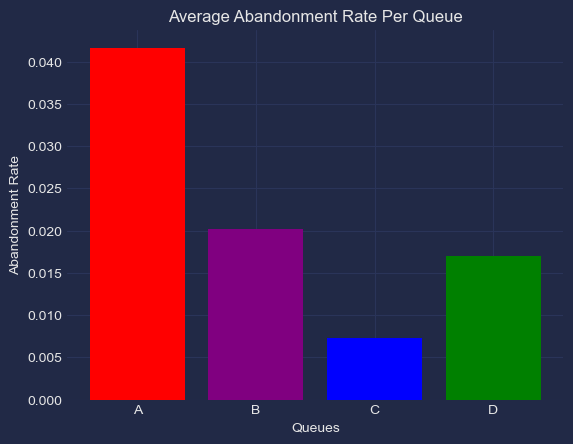

In [19]:
# Create visualization 1 here
# Import any additional libraries needed with alias

style.use('cyberpunk')


# The dictionary abandonment_rates has the data you need.
abandonment_rates = {}
queues = ["A", "B", "C", "D"]
queue_dict = df.groupby("Queue").agg("sum")
for i in range(4):
    abandonment_rates[queues[i]] = queue_dict["Abandoned"][i] / queue_dict["Calls"][i] 

#Your code below:
print(abandonment_rates)

names = list(abandonment_rates.keys())
values = list(abandonment_rates.values())

colors = ['red', 'purple', 'blue', 'green']


plt.bar(names, values, color=colors)
plt.xlabel('Queues')
plt.ylabel('Abandonment Rate')
plt.title('Average Abandonment Rate Per Queue')
plt.show()


##### Record your answer below:

> Chart style you chose and why: I chose bar graph because we had 4 different values to compare, and the values are not far from eachother.  and this offers a good way to compare them directly

#### Visualization 2: What is the service level percentage and average speed of answer for each rep in the North Branch?

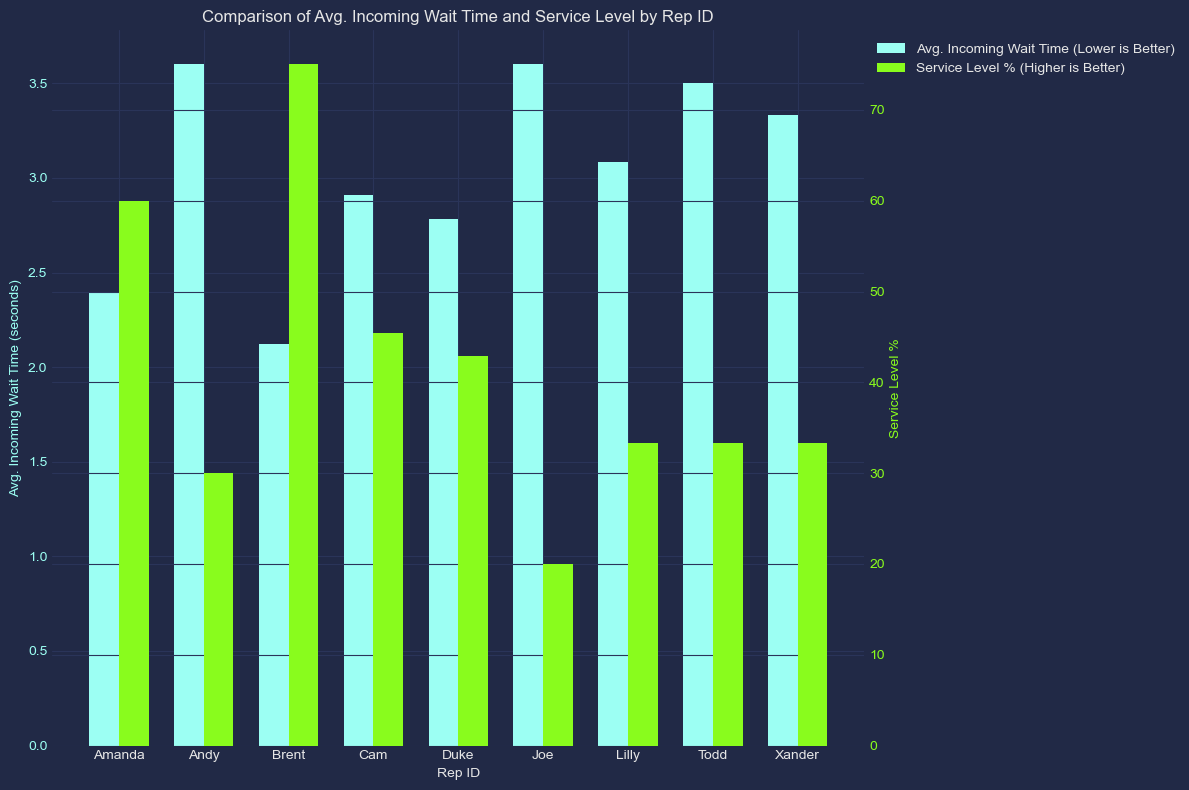

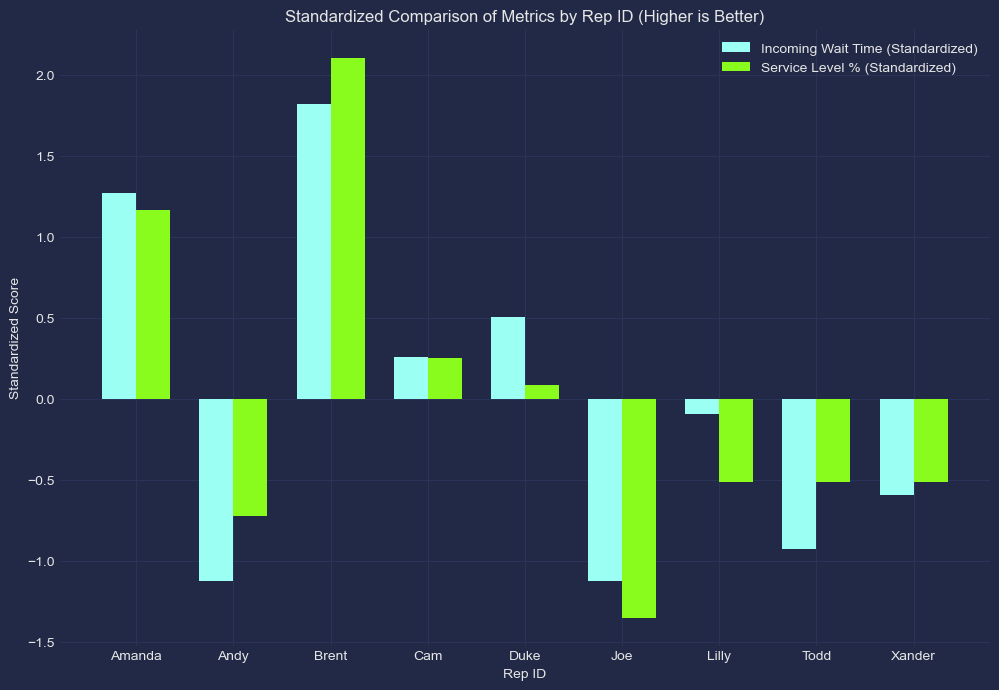

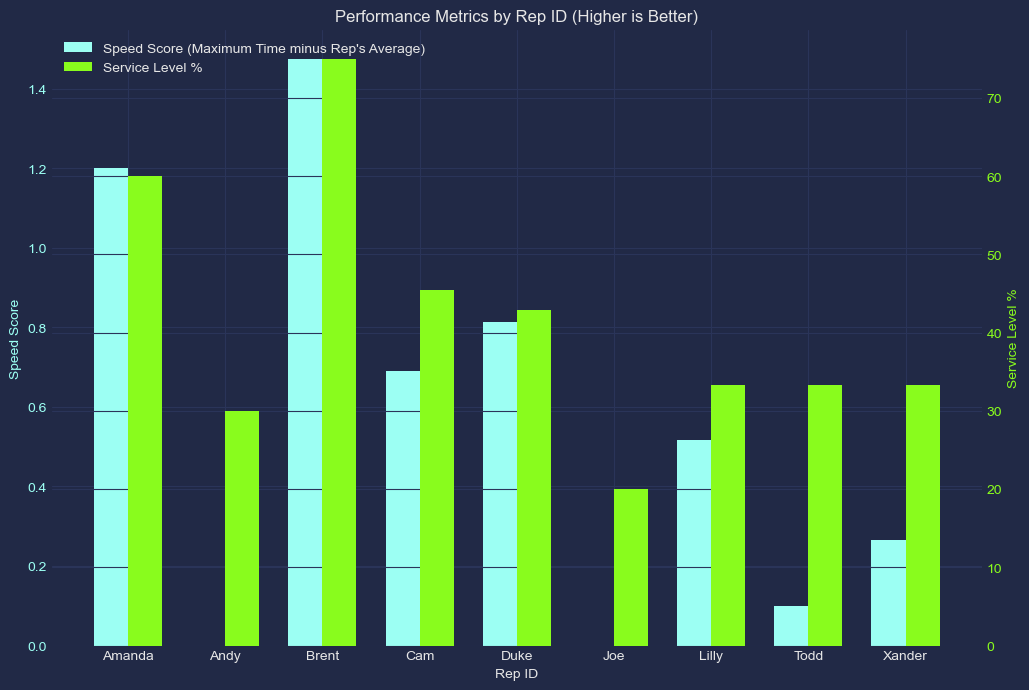

In [69]:
# Create visualization 2 here
# north_plt contains the data you need for the average speed of answer of each rep

north_plt = north_df.groupby("Rep ID")["Incoming Wait Time"].mean().to_frame().reset_index()

# Finding each Rep's Personal Service Level Percentage.  Basically, Calls within 2 secs / total calls

# Table 1: Total Incoming calls less than 2 seconds grouped by Rep
quick_calls = north_df[north_df["Incoming Wait Time"] <= 2.0]
quick_reps = quick_calls[["Rep ID", "Calls"]]
quick_stats = quick_reps.groupby(["Rep ID"]).sum()  # Final Table


# Table 2: Total Incoming Calls Only grouped by Rep
total_calls_in = north_df[north_df["Incoming or Outgoing"] == "Incoming"]
rep_calls = total_calls_in[["Rep ID", "Calls"]]     
total_stats = rep_calls.groupby(["Rep ID"]).sum() # Final Table  

#  Table 3: Service Level Percentage created via merge
service_level = pd.merge(quick_stats, total_stats, on="Rep ID")

# Create Percentage Column in Table 3
service_level["Service Level %"] = service_level["Calls_x"]/service_level["Calls_y"] * 100

#Your Code Here:

service_level = service_level.reset_index()
combined = pd.merge(north_plt, service_level[['Rep ID', 'Service Level %']], on='Rep ID')

plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(combined))

ax1 = plt.gca()
bars1 = ax1.bar(index - bar_width/2, combined['Incoming Wait Time'], bar_width, label='Avg. Incoming Wait Time (Lower is Better)', color='#9cfff3')
ax1.set_xlabel('Rep ID')
ax1.set_ylabel('Avg. Incoming Wait Time (seconds)', color='#9cfff3')
ax1.tick_params(axis='y', labelcolor='#9cfff3')
ax1.set_title('Comparison of Avg. Incoming Wait Time and Service Level by Rep ID')
ax1.set_xticks(index)
ax1.set_xticklabels(combined['Rep ID'])

# ax1.set_ylim(0, combined['Incoming Wait Time'].max() * 1.1)

ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, combined['Service Level %'], bar_width, label='Service Level % (Higher is Better)', color='#89fc1d')
ax2.set_ylabel('Service Level %', color='#89fc1d')
ax2.tick_params(axis='y', labelcolor='#89fc1d')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
# ax1.legend(lines + lines2, labels + labels2, loc='upper left')
ax1.legend(lines + lines2, labels + labels2, loc='upper left', bbox_to_anchor=(1, 1))

plt.tight_layout()

plt.show()

from scipy.stats import zscore

combined['Incoming Wait Time Z-Score'] = zscore(combined['Incoming Wait Time']) * -1
combined['Service Level % Z-Score'] = zscore(combined['Service Level %'])

plt.figure(figsize=(12, 8))
index = np.arange(len(combined))
bar_width = 0.35

plt.bar(index - bar_width/2, combined['Incoming Wait Time Z-Score'], bar_width, label='Incoming Wait Time (Standardized)', color='#9cfff3')

plt.bar(index + bar_width/2, combined['Service Level % Z-Score'], bar_width, label='Service Level % (Standardized)', color='#89fc1d')

plt.xlabel('Rep ID')
plt.ylabel('Standardized Score')
plt.title('Standardized Comparison of Metrics by Rep ID (Higher is Better)')
plt.xticks(index, combined['Rep ID'])
plt.legend()
plt.show()



max_wait_time = combined['Incoming Wait Time'].max()
combined['Speed Score'] = max_wait_time - combined['Incoming Wait Time']

plt.figure(figsize=(12, 8))

bar_width = 0.35
index = np.arange(len(combined))

ax1 = plt.gca()
bars1 = ax1.bar(index - bar_width/2, combined['Speed Score'], bar_width, label="Speed Score (Maximum Time minus Rep's Average)", color='#9cfff3')
ax1.set_xlabel('Rep ID')
ax1.set_ylabel("Speed Score", color='#9cfff3')
ax1.tick_params(axis='y', labelcolor='#9cfff3')
ax1.set_title('Performance Metrics by Rep ID (Higher is Better)')
ax1.set_xticks(index)
ax1.set_xticklabels(combined['Rep ID'])

ax2 = ax1.twinx()
bars2 = ax2.bar(index + bar_width/2, combined['Service Level %'], bar_width, label='Service Level %', color='#89fc1d')
ax2.set_ylabel('Service Level %', color='#89fc1d')
ax2.tick_params(axis='y', labelcolor='#89fc1d')

lines, labels = ax1.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax1.legend(lines + lines2, labels + labels2, loc='upper left')

plt.show()

##### Record your answer below:

> Chart style you chose and why:   Well I went with double bar graphs.  I used 3 different charts to convey the data.  The basic double bar has values that are inverted.  meaning higher is better for one, but lower is better for the other.  To find ways to convey this I used a standardized comparison to compare them with another chart that split the values in the middle, and created a new value called Speed Score that was the Maximum Wait Time minus the rep's average score, which gave us a way to have them both mean higher is better for the graph data points.

#### Visualization 3: For each type of call purpose, how many calls are outgoing vs. incoming?

Call Purpose     Incoming or Outgoing
Complaint        Incoming                 51
Product Support  Outgoing                228
                 Incoming                 82
Sales Support    Outgoing                123
                 Incoming                 75
Name: count, dtype: int64


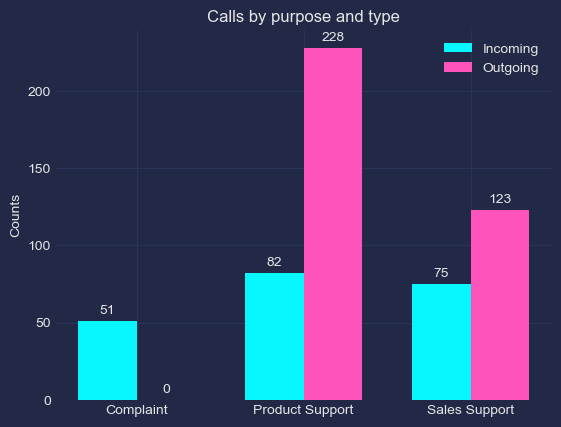

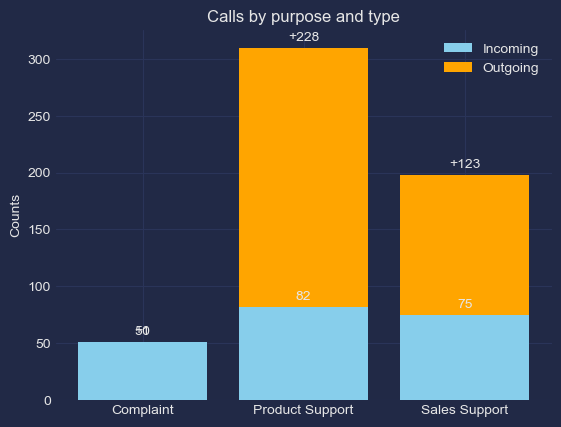

In [72]:
# Create visualization 3 here:
# The three dictionaries, complaints, sales_support, and product_support, have the information you need

purpose_group = df.groupby("Call Purpose")
call_purpose = ["Complaint", "Product Support", "Sales Support"]
purpose_counts = purpose_group["Incoming or Outgoing"].value_counts()
print(purpose_counts)

complaints = purpose_counts["Complaint"].to_dict()
sales_support = purpose_counts["Sales Support"].to_dict()
product_support = purpose_counts["Product Support"].to_dict()

#Your Code Here:
call_purpose = ['Complaint', 'Product Support', 'Sales Support']
incoming_counts = [51, 82, 75]
outgoing_counts = [0, 228, 123]

x = np.arange(len(call_purpose))  # the label locations
width = 0.35  # the width of the bars

fig, ax = plt.subplots()
rects1 = ax.bar(x - width/2, incoming_counts, width, label='Incoming')
rects2 = ax.bar(x + width/2, outgoing_counts, width, label='Outgoing')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Calls by purpose and type')
ax.set_xticks(x)
ax.set_xticklabels(call_purpose)
ax.legend()

ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3)

plt.show()




x = np.arange(len(call_purpose))  # the label locations

fig, ax = plt.subplots()
# Stacked bar for incoming calls
rects1 = ax.bar(x, incoming_counts, label='Incoming', color='skyblue')
# Stacked bar for outgoing calls, starts where incoming ends
rects2 = ax.bar(x, outgoing_counts, bottom=incoming_counts, label='Outgoing', color='orange')

# Add some text for labels, title and custom x-axis tick labels, etc.
ax.set_ylabel('Counts')
ax.set_title('Calls by purpose and type')
ax.set_xticks(x)
ax.set_xticklabels(call_purpose)
ax.legend()

# Label the values on the bars for clarity
ax.bar_label(rects1, padding=3)
ax.bar_label(rects2, padding=3, labels=[f"+{h}" for h in outgoing_counts])  # Shows outgoing as addition

plt.show()

##### Record your answer below:

> Chart style you chose and why: we have a double bar and a stacked bar chart.  I think I like the stacked bar chart better, but the double bar gives us a smallwer max value to work with thus makign the chart possibly easierto read?  I like the stacked bar for how it shows somewhat of a percentage split visually


## Task 5: Summarize Your Work

With what you know now about the two call centers and the entire company, answer the following questions. Note that while this is subjective, you should include relevant data to back up your opinion.


#### Summary Question 1:  Using KPIs such as average abandonment rate, service level and average speed of answer, in your opinion, which one of the two branches is operating more efficiently? Why?

##### Record your answer below:
> Your Answer: 

the north branch has 2 less employees, but their data points are basically the same as the south branch.  Thus the north branch is likely operating more efficiently.

#### Summary Question 2: Based on the number of reps in each branch and how quickly the reps are working, in your opinion, which branch would benefit from the extra help?

##### Record your answer below:
> Your Answer: 
Either branch could benefit.  If we were saying which branch would likely utilize the talent better I would say the north branch.  If we are asking which branch could use the talent to help speed it up then I would say the south branch.



#### Summary Question 3: Now that you have explored the datasets, is there any data or information that you wish you had in this analysis?

##### Record your answer below:
> Your Answer: 


## Bonus Mission
Create a visualization that answers this question: For each call purpose, how many calls (incoming and outgoing) take place in each time block?
##### Record your answer below:

> Chart style you chose and why: 

In [ ]:
# Create your Bonus Mission visualization here!
call_times = df[["Time Block", "Call Purpose", "Incoming or Outgoing", "Calls"]]

# Use groupby to plot based on time blocks:

# Use groupby and get_group to select which call purpose to plot: